## knn algo using the digit recognition dataset

### (using the digits dataset from sklearn)

In [14]:
# load the digits data
from sklearn import datasets

digits = datasets.load_digits()

In [15]:
# show image pixels as an array
print "Each image is an 8x8 array of pixels:"
print digits.images[0]

Each image is an 8x8 array of pixels:
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


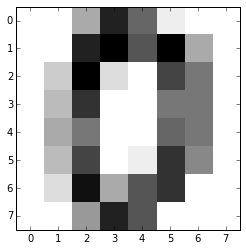

In [8]:
# plot an image
import pylab as pl

pl.imshow(digits.images[0], cmap=pl.cm.gray_r, interpolation='nearest')

In [12]:
# display the label (as a scalar) and features (as a vector)
print "This image has been labeled as a:" , digits.target[0]
print "Its 64 features (pixel values) are:"
print digits.data[0]

This image has been labeled as a: 0
Its 64 features (pixel values) are:
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


This image has been labeled as a: 1
Its 64 features (pixel values) are:
[  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.   0.
   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.  16.   2.
   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.   1.  16.  16.
   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.   0.   0.   0.  11.
  16.  10.   0.   0.]


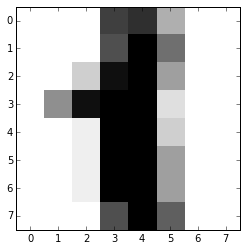

In [13]:
pl.imshow(digits.images[1], cmap=pl.cm.gray_r, interpolation='nearest')

print "This image has been labeled as a:" , digits.target[1]
print "Its 64 features (pixel values) are:"
print digits.data[1]

In [18]:
# evaluate a k-nearest neighbor model with different number of neighbors
from sklearn import neighbors
import numpy as np

# split the data into 80% for training and 20% for testing
num_train = int(digits.target.size * 0.8)

print num_train
print digits.target.size

1437
1797


In [27]:
train_data, train_target = digits.data[:num_train], digits.target[:num_train]
test_data, test_target = digits.data[num_train:], digits.target[num_train:]

# fit for k=1 to k=10
num_neighbors = range(1,11)

accuracyTrain = []
accuracyTest = []

for k in num_neighbors:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_target)

    accTrain = knn.score(train_data, train_target)
    accTest = knn.score(test_data, test_target)

    print "With k = %d neighbors, our train accuracy is %.2f%%" % (k, accTrain*100)
    print "With k = %d neighbors, our test accuracy is %.2f%%" % (k, accTest*100)

    accuracyTrain.append(accTrain)
    accuracyTest.append(accTest)

With k = 1 neighbors, our train accuracy is 100.00%
With k = 1 neighbors, our test accuracy is 95.56%
With k = 2 neighbors, our train accuracy is 99.10%
With k = 2 neighbors, our test accuracy is 96.39%
With k = 3 neighbors, our train accuracy is 99.37%
With k = 3 neighbors, our test accuracy is 96.67%
With k = 4 neighbors, our train accuracy is 99.23%
With k = 4 neighbors, our test accuracy is 96.67%
With k = 5 neighbors, our train accuracy is 99.10%
With k = 5 neighbors, our test accuracy is 96.39%
With k = 6 neighbors, our train accuracy is 99.10%
With k = 6 neighbors, our test accuracy is 95.28%
With k = 7 neighbors, our train accuracy is 99.03%
With k = 7 neighbors, our test accuracy is 95.28%
With k = 8 neighbors, our train accuracy is 98.89%
With k = 8 neighbors, our test accuracy is 95.00%
With k = 9 neighbors, our train accuracy is 98.89%
With k = 9 neighbors, our test accuracy is 95.00%
With k = 10 neighbors, our train accuracy is 98.89%
With k = 10 neighbors, our test accura

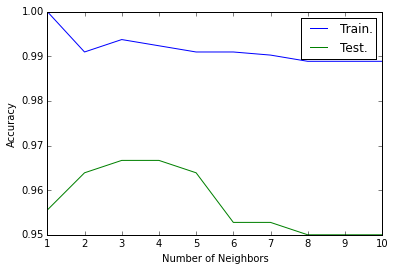

In [29]:
# plot the generalization error with increasing number of neighbors
import matplotlib.pyplot as plt

plt.plot(num_neighbors, accuracyTrain, label='Train.')
plt.plot(num_neighbors, accuracyTest, label='Test.')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [30]:
# evaluate the model with best generalization error
from sklearn.metrics import confusion_matrix, classification_report

# find the best value of k
k = num_neighbors[np.argmax(accuracyTest)]



In [31]:
# refit the model
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(digits.data[:num_train], digits.target[:num_train])

predicted = knn.predict(digits.data[num_train:])

print classification_report(digits.target[num_train:], predicted)

confmat = confusion_matrix(digits.target[num_train:], predicted)
print confmat

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       0.95      1.00      0.97        36
          2       0.97      1.00      0.99        35
          3       0.97      0.89      0.93        37
          4       1.00      0.92      0.96        37
          5       0.93      1.00      0.96        37
          6       1.00      1.00      1.00        37
          7       0.95      1.00      0.97        36
          8       0.94      0.94      0.94        33
          9       0.97      0.92      0.94        37

avg / total       0.97      0.97      0.97       360

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  1  0  1  1  0]
 [ 0  0  0  0 34  0  0  1  1  1]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  0 31  0]
 [ 0  0  0  1  0  2  0  0  0 34]]
